# Pandas

The pandas package helps you to work with *tabular* data; two-dimensional data of rows and columns.  Pandas is not suitable for working with higher-dimensionality (3D or more) datasets, such as a time-series of gridded observations, or multiple remotely-sensed layers from the same geographic region.

## So why are we learning about pandas then?

- Pandas can be useful when you have already made calculations on gridded datasets

- Xarray is inspired by and built on top of the pandas package

Pandas typically plays a bridging role in data analysis.  You have some other tool that generates the data -- such as a climate model.  You might use xarray to explore the multi-dimensional gridded data from the model.  

You calculate some lower dimensional fields from the model output and store them in pandas.  You can then use pandas to filter and plot the results.  

You then pass these results from pandas into another package such as sklearn to do statistical modelling on your results.

## Import the packages and dataset


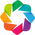

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holoviews as hv

%matplotlib inline
hv.notebook_extension('bokeh')

%load_ext autoreload
%autoreload 2

In [2]:
# Create a dataframe df from the data in the csv file
df = pd.read_csv('dublin_airport.csv')
# Print out the first rows of the dataframe
df.head()

,date,max temperature,min temperature,rain,pressure,wind speed,sunshine hours
0,1967-02-05,8.5,2.3,0.0,1023.0,12.5,2.7
1,1967-02-06,8.6,5.3,0.0,1019.0,12.8,0.5
2,1967-02-07,7.5,-1.0,0.0,1021.9,3.7,5.6
3,1967-02-08,6.7,-2.6,0.0,1024.6,2.9,3.2
4,1967-02-09,7.2,3.3,0.0,1020.6,4.8,2.8


In [3]:
# Print out the number of rows and columns
df.shape

(18197, 7)

## Tidy the dataset

We would like to set the date column be the row index rather than just have an integer count as the index.

In [4]:
# Set the date column to be the index
df.set_index('date',inplace=True)
# Convert the date column to be a datetime object
df.index = pd.to_datetime(df.index)
df.head()

,max temperature,min temperature,rain,pressure,wind speed,sunshine hours
date,,,,,,
1967-02-05,8.5,2.3,0.0,1023.0,12.5,2.7
1967-02-06,8.6,5.3,0.0,1019.0,12.8,0.5
1967-02-07,7.5,-1.0,0.0,1021.9,3.7,5.6
1967-02-08,6.7,-2.6,0.0,1024.6,2.9,3.2
1967-02-09,7.2,3.3,0.0,1020.6,4.8,2.8


We also want to remove rows with missing values.

In [5]:
# Remove rows that are missing values
df = df.dropna()
# Compare the size of the edited dataset
df.shape

(18177, 6)

Some of the column names have two words.  This makes it hard to use the built-in shortcuts. We want to rename any columns that have two words in their title, by replacing the space with an underscore.

In [6]:
# Dictionary comprehension that maps the original column names to the new column names where two word names are 
# joined together
column_mapping = {col_name :'_'.join(col_name.split()) for col_name in df.columns}
# Rename the columns
df.rename( columns = column_mapping, inplace = True )
# Show the current dataframe with the new column names
df.head()

,max_temperature,min_temperature,rain,pressure,wind_speed,sunshine_hours
date,,,,,,
1967-02-05,8.5,2.3,0.0,1023.0,12.5,2.7
1967-02-06,8.6,5.3,0.0,1019.0,12.8,0.5
1967-02-07,7.5,-1.0,0.0,1021.9,3.7,5.6
1967-02-08,6.7,-2.6,0.0,1024.6,2.9,3.2
1967-02-09,7.2,3.3,0.0,1020.6,4.8,2.8


## Labelled data
- Each datapoint is now associated with a column name (e.g. rain) and an index value (e.g. 1969-07-15).
- We can use these labels when writing our code - this makes the code easier to read and write

For example,we can plot the rainfall column:

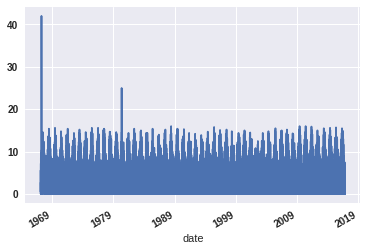

In [10]:
df.sunshine_hours.plot()

There might be a couple of suspicious values here with more than 24 hours of daily sunshine!

## Indexing and accessing data in a dataframe

The labels help you to access data in a dataframe.  There are a number of ways to access data.  

#### Accessing columns
For example, the columns are now *attributes* of the dataframe ```df``` and so can be accessed using the dot notation, as we did just now with the rainfall column.

In [41]:
df.wind_speed.head()

date
1967-02-05    12.5
1967-02-06    12.8
1967-02-07     3.7
1967-02-08     2.9
1967-02-09     4.8
Name: wind_speed, dtype: float64

#### Accessing rows
To access data on a particular *row* of a dataframe, you *could* use numpy syntax.  To get the fifth element in the wind speed column for example, you can use:

In [42]:
df.wind_speed[4]

4.7999999999999998

However, using this numpy syntax can lead to problems when using pandas.  The numpy syntax also doesn't take advantage of the labels we have for rows and columns.

To take advantage of the labels, you should use the ```.loc``` method to access data in the dataframe. The syntax for ```.loc``` is that the **first** element in the square brackets sets the **row** and the **second** element sets the **column**.  This behaviour carries over to xarray.

In this case the fifth row of the dataframe is the 9th of February 1967 and we can access the wind speed on that date as:

In [43]:
df.loc['1967-02-09', 'wind_speed']

4.7999999999999998

You can access multiple rows by slicing the first element:

In [10]:
df.loc['1967-02-07':'1967-02-09', 'wind_speed']

date
1967-02-07    3.7
1967-02-08    2.9
1967-02-09    4.8
Name: wind_speed, dtype: float64

and you can access multiple columns by making the second argument to ```.loc``` a tuple with column names:

In [13]:
df.loc['1967-02-07':'1967-02-09', ('max_temperature','wind_speed')]

,max_temperature,wind_speed
date,,
1967-02-07,7.5,3.7
1967-02-08,6.7,2.9
1967-02-09,7.2,4.8


You can use ```.loc``` to replace values that are clearly incorrect, for example days where the sunshine hours is greater than 24.

In [13]:
df.sunshine_hours.max()

42.0

You can replace these values with NaN

In [14]:
df.loc[df.sunshine_hours > 24,'sunshine_hours'] = np.NaN
df.sunshine_hours.max()

16.0

## Exercise
Plot the mean wind speed column.  

Check if there wind speed values that look like errors.  

Use the ```.loc``` method to set these values to NaN

In [15]:
## Exercise code

#### Implicit index
In this case the dates are the *explicit* index of the dataframe ```df```.  The dataframe also has an *implicit* index which is just an integer count of the row or column.

To use the implicit index you use the **```.iloc```** method to access rows and columns.

The syntax is similar to the ```.loc``` method, in that the first element sets the rows you access, while the second element sets the columns:

In [15]:
# Access rows 3 and 4 and columns 0 and 1
df.iloc[3:5,0:2]

,max_temperature,min_temperature
date,,
1967-02-08,6.7,-2.6
1967-02-09,7.2,3.3


An importance difference between ```.loc``` and ```.iloc``` is where the indexing stops.  

For ```.loc``` the final element in a slice is *included* in the output, but for ```.iloc``` the final element in a 
slice is *excluded* in the output!

### Boolean operations
You can also use the ```.loc``` and ```.iloc``` methods to do Boolean operations on rows.  For example, we could select all the rows where the maximum temperature is greater than 30 C:

In [16]:
df.loc[df.max_temperature > 30]

,max_temperature,min_temperature,rain,pressure,wind_speed,sunshine_hours
date,,,,,,
1975-08-03,30.5,12.0,0.0,1011.9,4.2,12.7
2006-07-19,31.0,15.1,0.0,1004.2,6.0,9.8


And we see that the maximum temperature has exceeded 30 degrees occurred twice (twice!!) in this 50-year long dataset.

## Exercise
Find all the rows where the minimum temperature is less than 0.

Find all the rows with potential for snowfall i.e. where the minimum temperature is less than 0 and "rainfall" is greater than 0.  Hint: place each condition in round brackets and join them using &

In [22]:
## Exercise code

## Fast computation with pandas

Pandas has many built-in features to do fast computation.

Operations on columns are vectorised.  For example, we approximate the mean temperature as

In [23]:
df['mean_temperature'] = (df.min_temperature + df.max_temperature) / 2

There are also numerous built-in functions for calculating statistics on your data. For example, to get the 10th percentile of the minimum temperature you enter

In [15]:
df.min_temperature.quantile(0.1)

-0.2

This means that only about 1 in 10 days has had a *minimum* temperature below 0 degrees in Dublin.

# GroupBy
A common research objective is to compare different subsets of our dataset e.g. different months, regions, instruments and so on. 

1. This means that we want to *split* out dataset into the different subsets
2. We want to *apply* an operation to each subset e.g. take the mean
3. We want to re-combine the results of these operations into a *new* dataframe

## Doing *split*, *apply* and *combine* with `.groupby()`
Pandas comes with a method to carry out this split, apply and combine
operation called `.groupby()`.
We can see the steps in this process in this schematic from the
[excellent Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)
![](https://github.com/jakevdp/PythonDataScienceHandbook/raw/058289a6a8a544d2bc144ba0226d6ef27986e4e0/notebooks/figures/03.08-split-apply-combine.png)



You can use groupby combined with a datetime index to do things like extract the seasonal cycle in an efficient way.  

In [26]:
df.index

DatetimeIndex(['1967-02-05', '1967-02-06', '1967-02-07', '1967-02-08',
               '1967-02-09', '1967-02-10', '1967-02-11', '1967-02-12',
               '1967-02-13', '1967-02-14',
               ...
               '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', name='date', length=18177, freq=None)

Here we calculate a mean on the *output* of a groupby operation which groups data by month.  We assign the results of our calculation to a new dataframe called ```climatology```, where the index corresponds to the month number.

In [28]:
# Group the columns by month and take the mean
climatology = df.groupby( df.index.month ).mean()
climatology

,max_temperature,min_temperature,rain,pressure,wind_speed,sunshine_hours,mean_temperature
date,,,,,,,
1,7.919314,2.149110,2.150692,999.822610,13.245419,1.684904,5.034212
2,8.009324,1.848754,1.844698,1001.534804,12.150676,2.507972,4.929039
3,9.928830,2.561862,1.585585,1002.120039,11.923465,3.309567,6.245346
4,12.147365,3.483856,1.658706,1003.197865,9.639893,5.128886,7.815610
5,14.918464,6.063202,1.929051,1003.156294,9.091737,5.809684,10.490833
6,17.844526,8.819893,1.951202,1004.733111,8.466021,5.580841,13.332210
7,19.682429,10.931848,1.725581,1004.273320,8.632235,4.931460,15.307138
8,19.304910,10.574289,2.223708,1003.897610,8.585982,4.831395,14.939599
9,17.041255,8.857610,2.024232,1003.432710,9.581375,4.068291,12.949433


We can use our new ```climatology``` dataframe to plot the seasonal cycle:

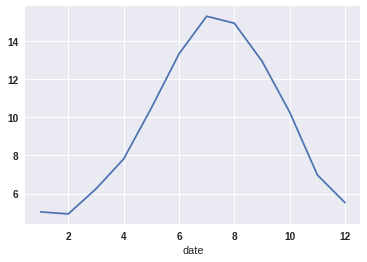

In [33]:
# Plot the seasonal cycle
climatology.mean_temperature.plot()

## Exercise
Plot the seasonal cycle for other variables

In [34]:
## Exercise code

We can also calculate annual averages by grouping by the year of the index.

For example, we can look at the annual average rainfall and plot it directly.

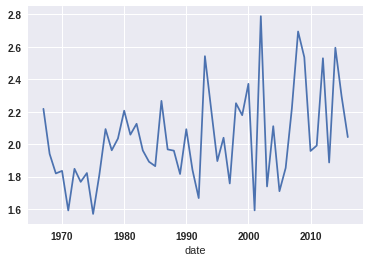

In [36]:
df.rain.groupby(df.index.year).mean().plot()

You can also use ```.groupby``` to look at extreme values. For example, we can look at the number of days per year with more than 10 mm of rainfall.  We also set the y-limits for the plot explicitly.

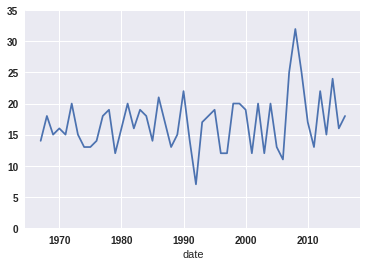

In [38]:
df.rain.loc[df.rain > 10].groupby(df[df.rain > 10].index.year).count().plot(ylim = (0,35))

### Exercise
Look at how other extreme weather values have varied in Dublin over the last 50 years.

When considering a threshold for an extreme maximum temperature, bear in mind the following quote from one of my cousins:

"It is a well known scientific fact, that Irish people **melt** at temperatures above 25 degrees".

In [39]:
## Exercise code

## Pivot tables (Groupby with multiple group conditions)

### Changes in the seasonal cycle

We want to look at how the seasonal cycle appears when averaged by decade over the fifty years.  To do this we need to group the data by month - to get the seasonal cycle - but also by decade.  To do multiple grouping, we use the ```.pivot_table``` method of a dataframe.

The datetime index has attributes of years, months, day of year, day of week.  However, the datetime index doesn't include decades as an attribute.  As such we have to use the year attribute to get the decade.  There is a trick for doing this where we lose the last digit of the year by doing integer division by 10 using ```//``` and then multiply by 10 to get the decade:

In [28]:
(df.index.year//10)*10

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='date', length=18177)

You can use this trick below to group the data by month and decade.  To add more informative labels onto the axes, we first create the figure and axis using plt.subplots(), then do the pivot table calculation before adding the axis labels back on.

In [40]:
df['decade'] = (df.index.year//10)*10 # Create a new column to track the decade
df.pivot_table('max_temperature', # Use the max temperature column of df
               index = df.index.month, # Group by month
               columns = 'decade', # Group by decade
               aggfunc = 'mean'); # Take the mean

We create a plot with a legend and axis labels for this seasonal cycle by decade.

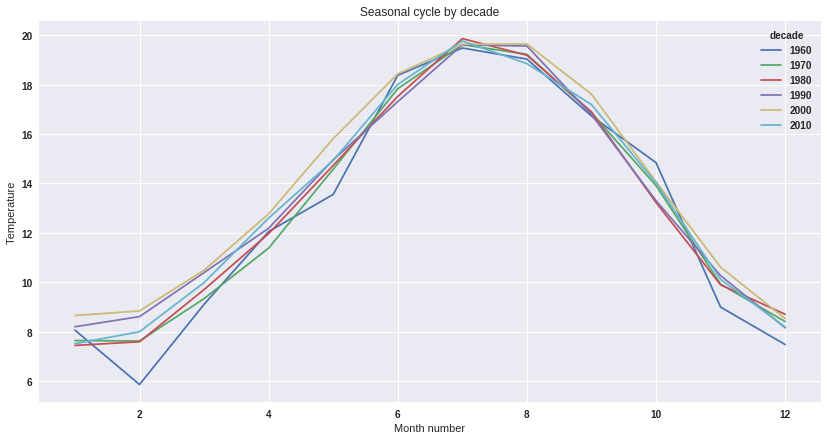

In [41]:
# Create the figure and axis object and set the figure size
fig, ax = plt.subplots(figsize = (14,7))
# Do the pivot table calculation and plot it on the axis
ax = df.pivot_table('max_temperature', index=df.index.month,
                                       columns='decade',
                                       aggfunc='mean').plot(ax = ax)
# Add more informative axes labels
ax.set(xlabel = 'Month number', ylabel = 'Temperature', title = 'Seasonal cycle by decade')
# Show the plot
plt.show()

Overall, there is no clear difference in the seasonal cycle.  The values from the 1960s should be treated with caution as less than three years of data are available from that decade.

### Exercise

Explore how the seasonal cycle in other variables has changed.

Examine how the variability in the seasonal cycle emerges as the index is changed to shorter intervals than a month.

In [42]:
## Exercise code

## Plotting with pandas

Pandas has built-in functionality for plotting with matplotlib.  For example, you can do a scatter plot like this using the dataframe's ```.plot()``` method:

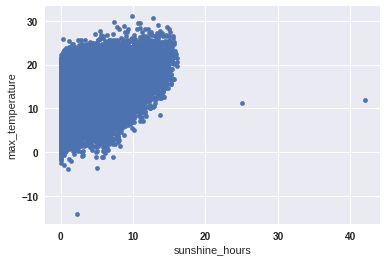

In [153]:
df.plot(x = 'sunshine_hours', y = 'max_temperature', kind = 'scatter')
plt.show()

A lot of the data is overlapping in this plot.  You can pass through the same arguments that you would normally give to a scatter plot in matplotlib.  For example, you can make the plots transparent to reduce the effect of the overlap.

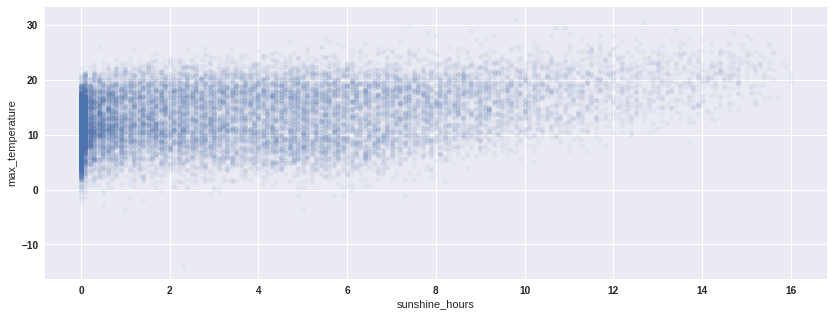

In [175]:
df.plot(x = 'sunshine_hours', y = 'max_temperature', 
        kind = 'scatter', alpha = 0.05, # Set alpha (transparency) to a low value
        figsize = (14,5))
plt.show()

There's quite a lot of data in this plot though, so you can also restrict the date range using ```.loc```:

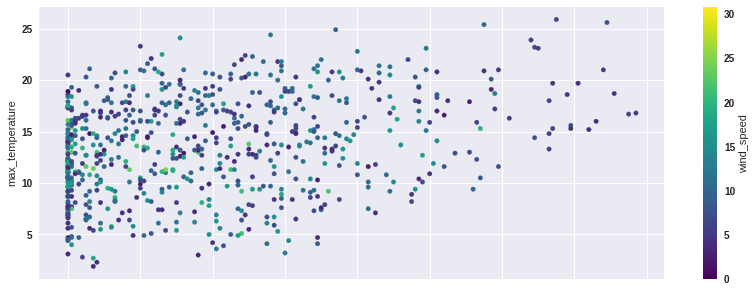

In [174]:
df.loc[(df.index >'2015-1-1')].plot(x = 'sunshine_hours', y = 'max_temperature', 
                                    kind = 'scatter',  
                                    c = 'wind_speed',cmap = plt.cm.viridis,
                                    figsize = (14,5))
plt.show()

The seaborn package is pandas-aware and has more plotting alternatives:

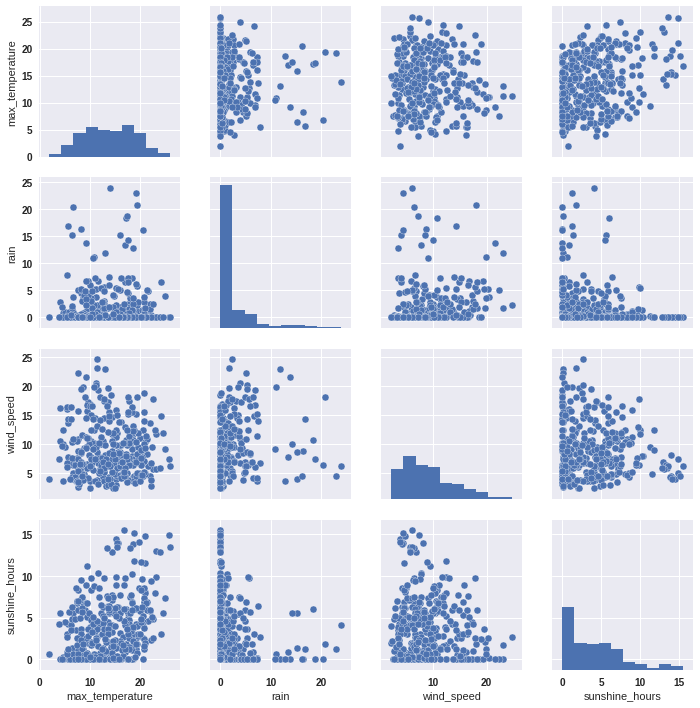

In [29]:
sns.pairplot(df.loc[df.index > '2016-1-1',('max_temperature', 'rain', 'wind_speed', 'sunshine_hours')])

The holoviews package provides an alternative plotting method that allows you to interact with the plots (though datetime axis support is not provided yet).

In [45]:
%%output size=150
s1 = hv.Curve(df.groupby(df.index.month).max_temperature.mean())
s1

:Curve   [x]   (y)

In matplotlib you can also provide a dataframe to produce a plot using the ```data``` keyword argument

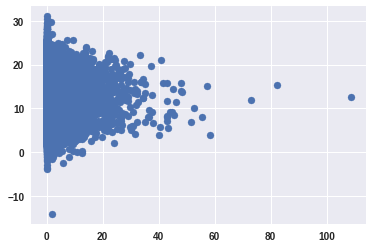

In [33]:
fig, ax  = plt.subplots()
ax.scatter('rain','max_temperature', data = df)

## Disadvantages of using pandas

While pandas has many useful features, there are some disadvantages to be aware of:
- pandas can be memory intensive due to lots of copying of datasets internally when carrying out operations
A rule of thumb is that you need five to ten times more memory than the size of your dataset
- Operations are generally carried in serial rather than parallel
The dask package provides a way to carry out dataframe operations in parallel
- There is no query planning
Say you want to find out the mean rainfall on days when there is some rainfall.  You execute something like: ```df.loc[df.rain > 0].rain.mean()```.  

You imagine that pandas will look at the rain column and take the mean of the days when there is non-zero rain.  In fact, pandas first creates a new dataframe in memory with *all the columns* and the rows with non-zero rain.  It then looks at the rain column of this new dataframe and calculates the mean of the rain column.  If your dataset is large this will incur a significant cost. Again, the dask package we look at next can provide a partial solution to this problem.

# This is not an exit!

This has just been the briefest of intros to the pandas package.  If you want to learn more, I'd recommend starting with: 
- the chapter on pandas in [the python data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
- or [this blog post on selecting data in a dataframe](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c)

The [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) is also useful.

Pandas is part of the first generation of data analysis tools in python.  Work is underway to allow even more efficient data analysis in pandas in the future.  You can read more about that [in this blog post](http://wesmckinney.com/blog/apache-arrow-pandas-internals/) by pandas creator Wes McKinney.